# mBuild Tutorial 04: Constructing Larger Compounds

This tutorial demonstrates how to create larger `Compounds` by taking advantage of `Ports`.  In particular, a linear alkane will be constructed by adding to the CH2 moiety class defined in a prior tutorial.

As in the prior tutorials, we need to first import mbuild (here as `mb`), import the visualization routines (as `visualize`), and apply the matplotlib command to redirect plots to the notebook window.

In [1]:
%matplotlib notebook
from visualize import visualize
import mbuild as mb

In general, connecting atoms together using `Ports` to create small moieties is unnecessary as these can be loaded from structure files; however, this functionality is important for creating larger and more complex `Compounds`. Here, we will extend the CH2 class constructed in a prior tutorial, adding two `Ports` (labeled `up` and `down`) to the central carbon atom.

In [2]:
class CH2(mb.Compound):
    def __init__(self):
        super(CH2, self).__init__()
        
        mb.load('ch2.pdb', compound=self)
        carbon = list(self.particles_by_name('C'))[0]
        up_port = mb.Port(anchor=carbon, orientation=[0, 0, 1], separation=0.075)
        down_port = mb.Port(anchor=carbon, orientation=[0, 0, -1], separation=0.075)
        self.add(up_port, label='up')
        self.add(down_port, label='down')

Now we'll explore how `Ports` can be used to connect `Compounds` by connecting two CH2 groups to create a C2H4 group. We'll first use mBuild's `clone` function to create two deep copies of our CH2 `Compound`, similar to to what was done in the prior tutorial to create copies of the hydrogen atom. 

We can use the `translate` function to move one copy so that they are not on top of one another. 

Note, in order to visualize the two compounds simultatneously, we'll  add these to a temporary `Compound` (`temp_compound`). 

<IPython.core.display.Javascript object>


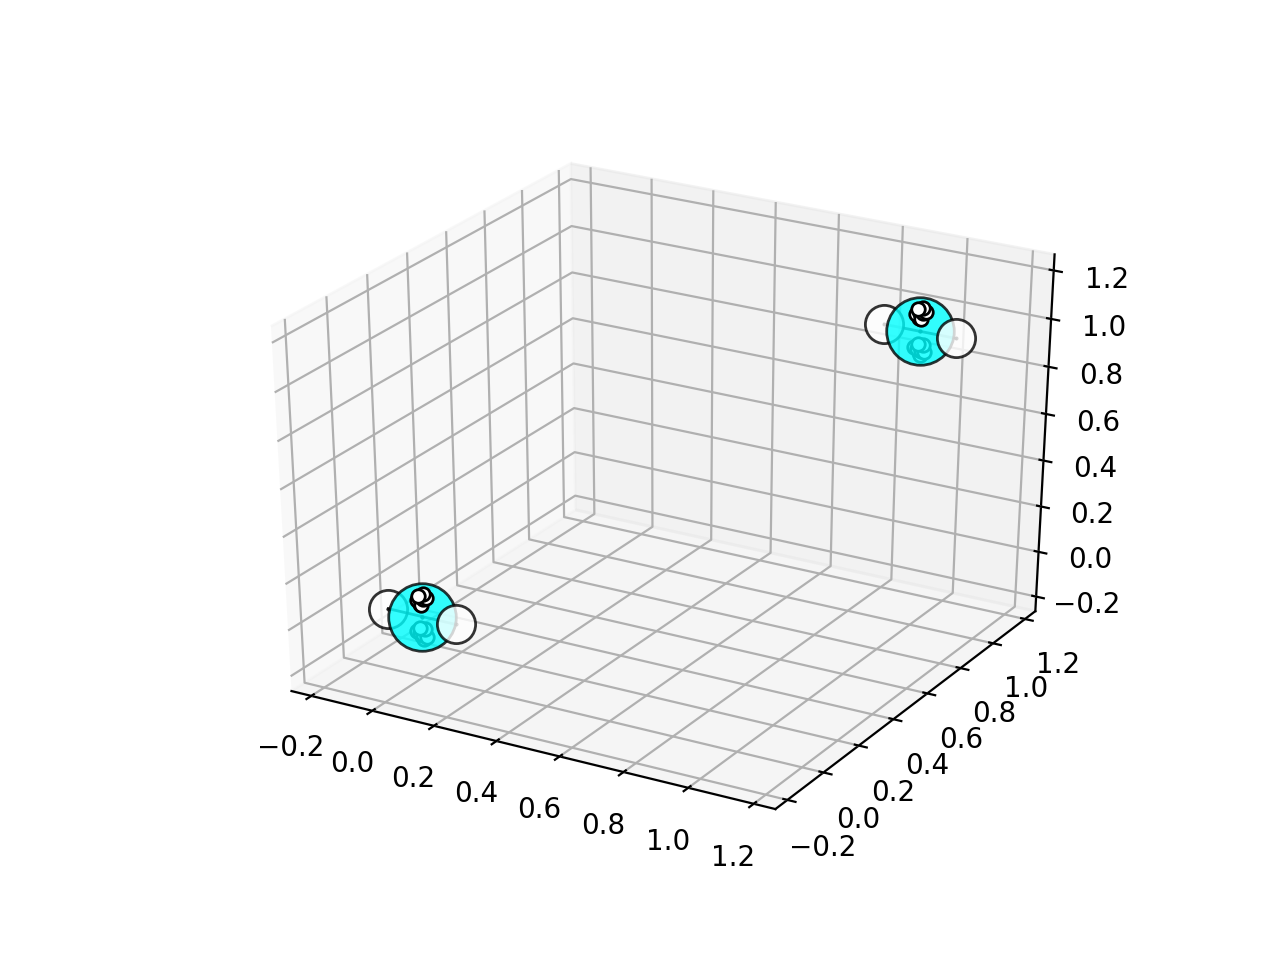

In [3]:
first_ch2 = CH2()
second_ch2 = CH2()
second_ch2.translate([1, 1, 1])
temp_compound = mb.Compound()
temp_compound.add((first_ch2, second_ch2))
visualize(temp_compound)

These two CH2 `Compounds` can be trivially connected using the `force_overlap` command, just as was done when connecting the carbon and hydrogen atoms in the previous tutorial; mBuild is designed to be general and flexible and does not distinguish between a `Compound` that describes a single atom or a collection of atoms. 

<IPython.core.display.Javascript object>


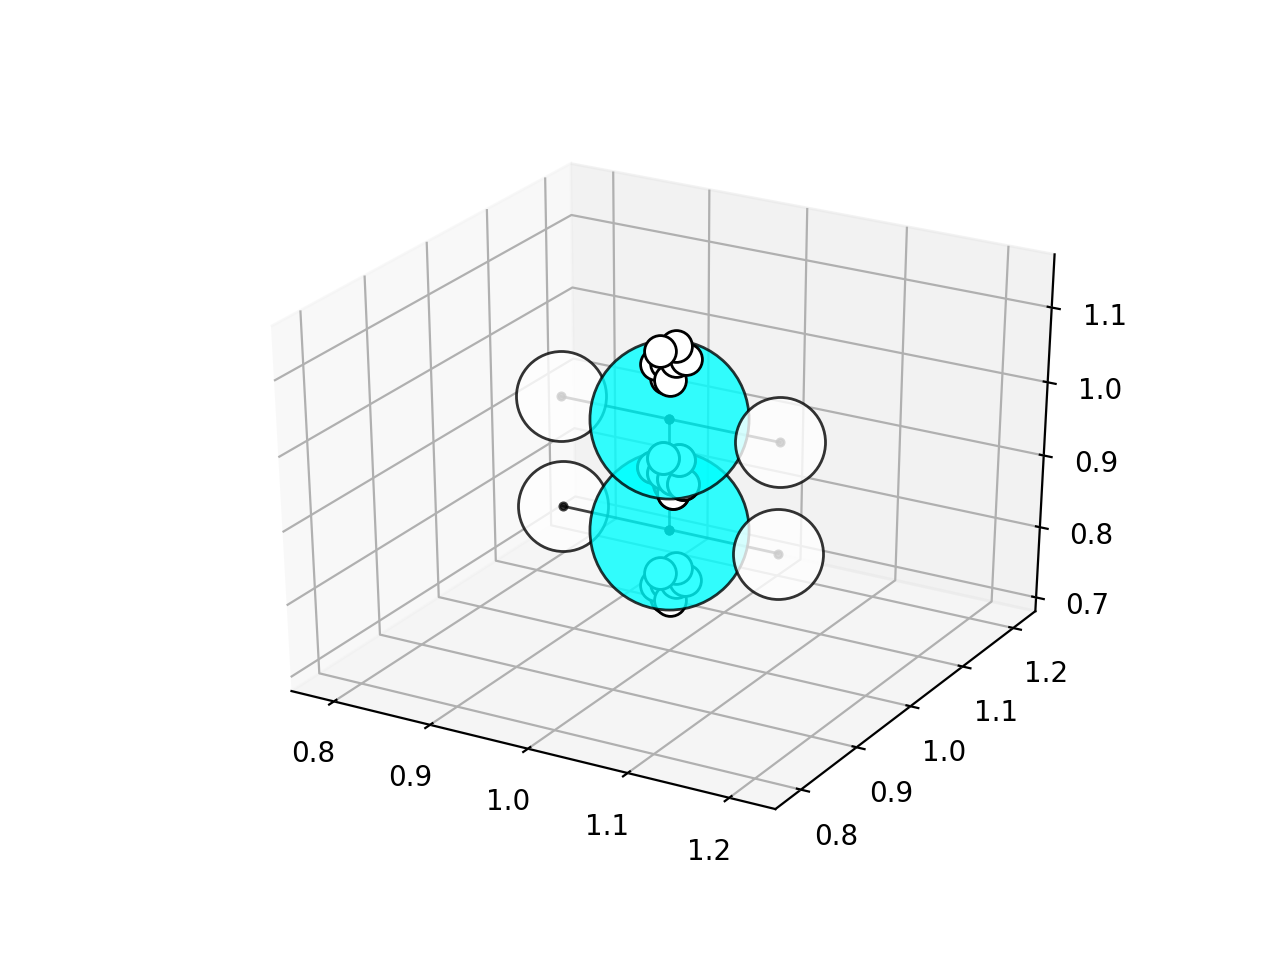

In [4]:
mb.force_overlap(move_this=first_ch2,
                 from_positions=first_ch2['up'],
                 to_positions=second_ch2['down'])

visualize(temp_compound)

### Building a linear alkane

Now that we've explored the basics of creating mBuild `Compounds` and connecting them together using ports, we'll use this approach to create a slightly more complex molecule, a linear butane.

We could approach our butane construction by connecting two CH2 moieties and two CH3 moieties. Alternatively, we could connect four CH2 moieties and cap the ends of the chain with hydrogen atoms. 

In this example, we will take the latter approach. As such, we'll need to also define a class for a hydrogen atom featuring a single `Port`.

In [5]:
class Hydrogen(mb.Compound):
    def __init__(self):
        super(Hydrogen, self).__init__()
        
        self.add(mb.Particle(name='H'))
        up_port = mb.Port(anchor=self[0], orientation=[0, 0, 1], separation=0.05)
        self.add(up_port, 'up')

We now have all of the pieces necessary to create a butane molecule. To begin, we'll instantiate an empty mBuild `Compound` to add our pieces to.

In [6]:
butane = mb.Compound()

Now, we'll create one of our CH3 ends by connecting a CH2 group and a hydrogen atom. We'll then add these two `Compounds` to our butane, giving them each a label. Note that by providing `ch2[$]` as the label for our CH2 group, mBuild will create a list that any subsequent parts added to the `Compound` with the same label prefix will be appended to.

<IPython.core.display.Javascript object>


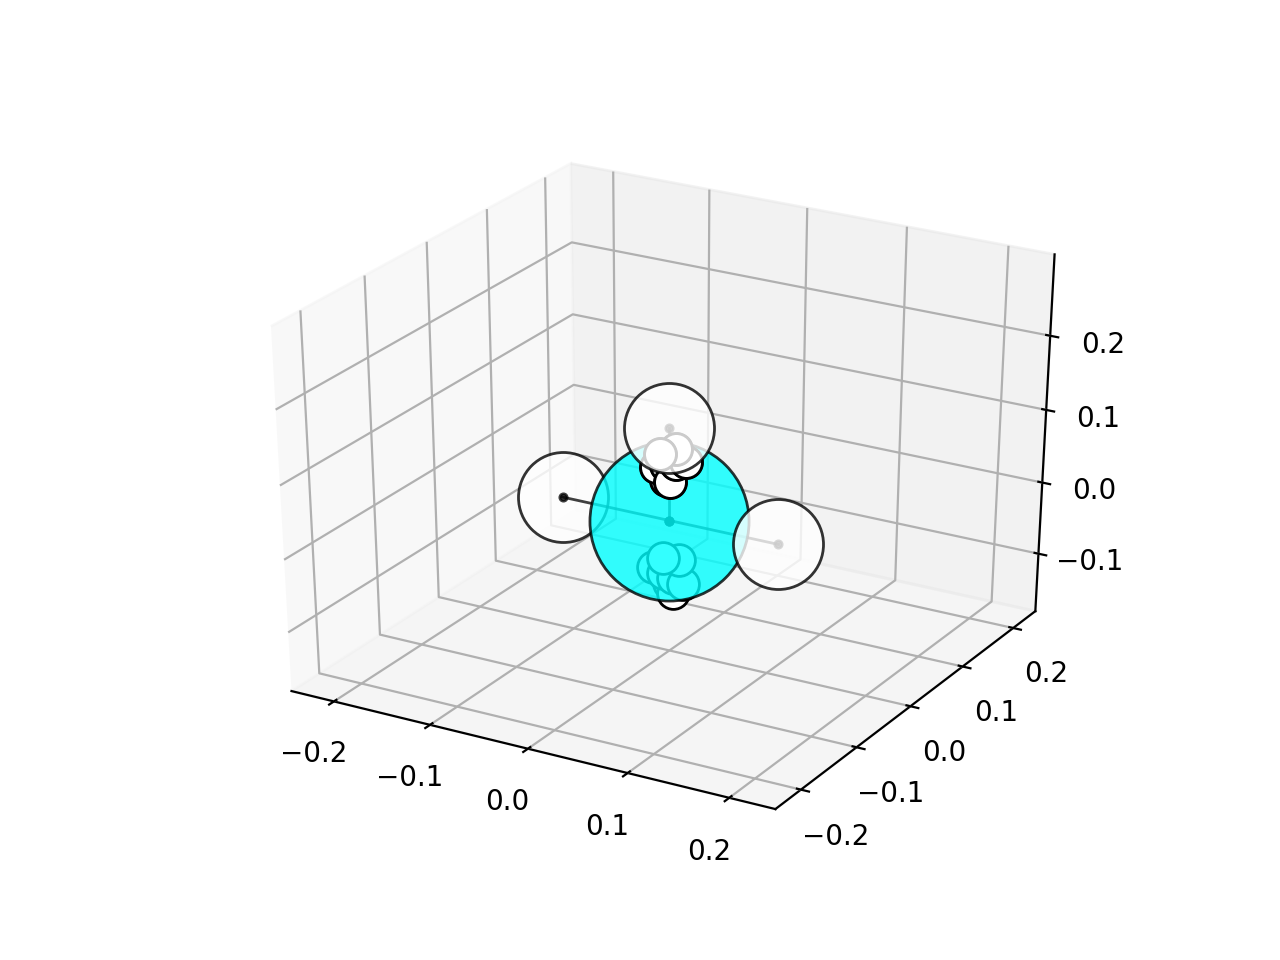

In [7]:
hydrogen = Hydrogen()
last_unit = CH2()
mb.force_overlap(move_this=hydrogen,
                 from_positions=hydrogen['up'],
                 to_positions=last_unit['up'])
butane.add(last_unit, label='ch2[$]')
butane.add(hydrogen, label='up-cap')
visualize(butane)

To continue to create our butane molecule, we'll next attach three CH2 groups to the CH3 cap we've just created. This can be set up in a loop, where we'll use `force_overlap` to iteratively attach each new CH2 instantiation to the last unit on the chain.

<IPython.core.display.Javascript object>


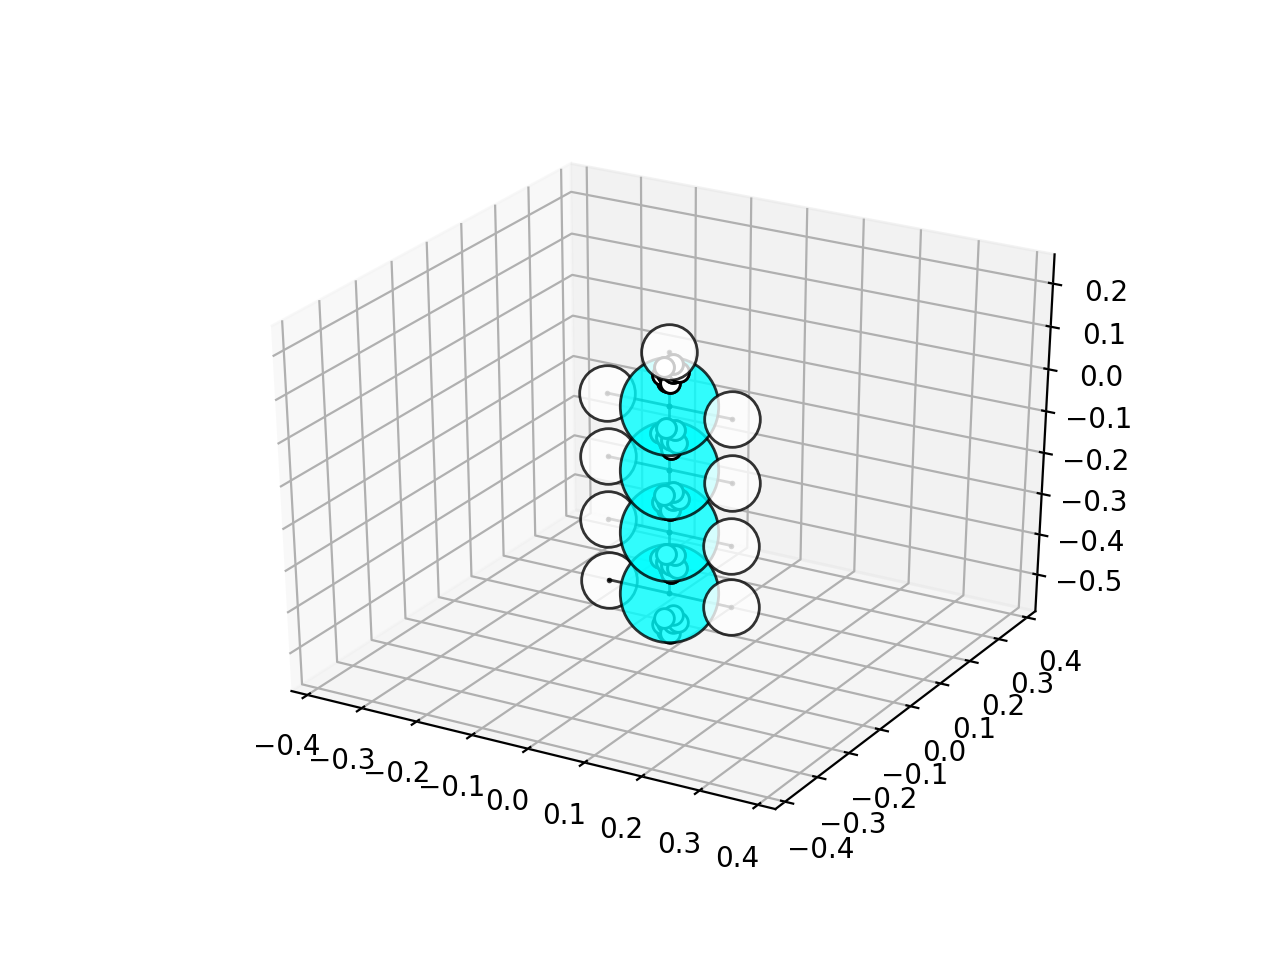

In [8]:
for _ in range(3):
    current_unit = CH2()
    mb.force_overlap(move_this=current_unit,
                     from_positions=current_unit['up'],
                     to_positions=last_unit['down'])
    butane.add(current_unit, label='ch2[$]')
    last_unit=current_unit

visualize(butane)

Finally, we need to cap the end of our molecule with a hydrogen atom to complete the creation of butane.

<IPython.core.display.Javascript object>


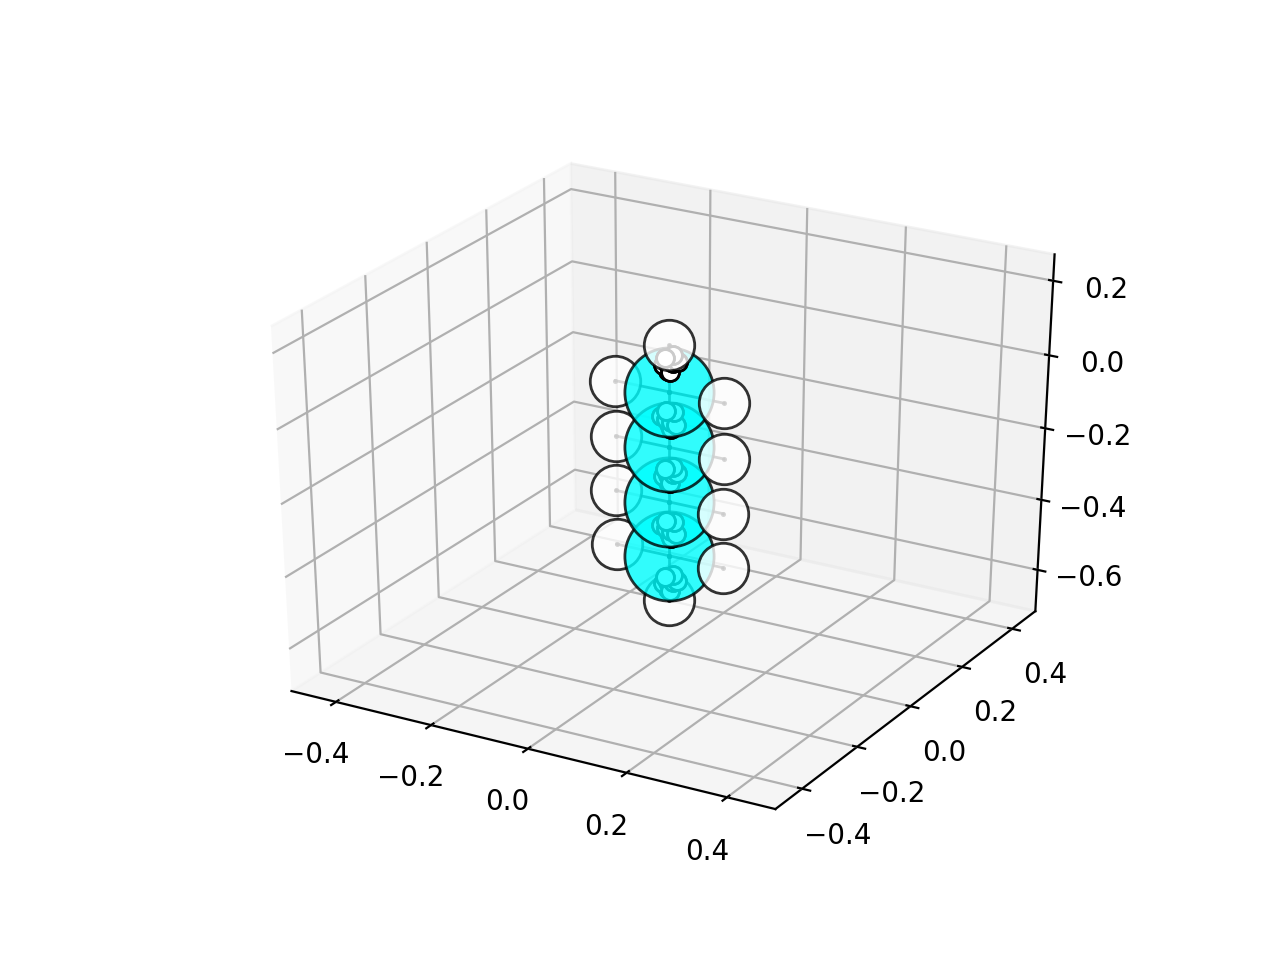

In [9]:
hydrogen2 = Hydrogen()
mb.force_overlap(move_this=hydrogen2,
                 from_positions=hydrogen2['up'],
                 to_positions=last_unit['down'])
butane.add(hydrogen2, label='down-cap')
visualize(butane)

As shown previously, we can also wrap all of these commands into a reusable class.

In [12]:
class Butane(mb.Compound):
    def __init__(self):
        super(Butane, self).__init__()
        
        hydrogen = Hydrogen()
        last_unit = CH2()
        mb.force_overlap(move_this=hydrogen,
                         from_positions=hydrogen['up'],
                         to_positions=last_unit['up'])
        self.add(last_unit, label='ch2[$]')
        self.add(hydrogen, label='up-cap')
        for _ in range(3):
            current_unit = CH2()
            mb.force_overlap(move_this=current_unit,
                             from_positions=current_unit['up'],
                             to_positions=last_unit['down'])
            self.add(current_unit, label='ch2[$]')
            last_unit=current_unit
        hydrogen = Hydrogen()
        mb.force_overlap(move_this=hydrogen,
                         from_positions=hydrogen['up'],
                         to_positions=last_unit['down'])
        self.add(hydrogen, label='down-cap')

<IPython.core.display.Javascript object>


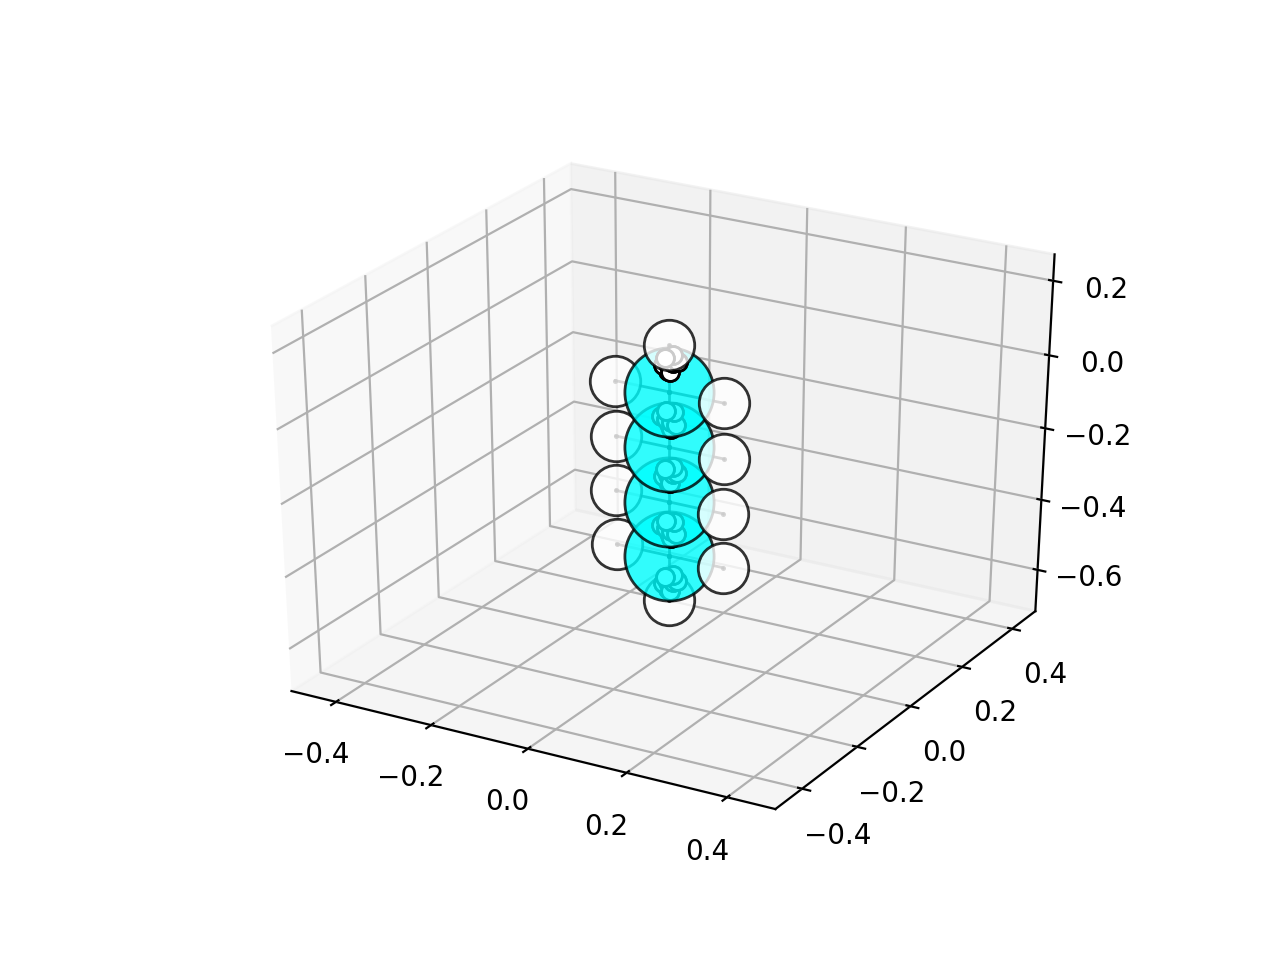

In [11]:
butane = Butane()
visualize(butane)